# DATA_MINING_FINAL_PROJECT

- GROUP MEMBERS
  - Manasa Maddineni
  - Karthik P
 

The dataset on American College and University Rankings 'Universities.csv' (downloadable from **https://github.com/gedeck/dmba/tree/master/datasets** ; Also can be imported from the dmba package as shown often in class ) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements, including continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or public school).

Note that many records are missing some measurements. Our first goal is to estimate these missing values from "similar" records. This will be done by clustering the complete records and then finding the closest cluster for each of the partial records. The missing values will be imputed from the information in that cluster.

In [40]:
pip install gower

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Import all the necessary libraries

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [42]:
# Load the data

universities=pd.read_csv(r"C:\\Users\\91958\\Documents\\SEM3\\Datamining_670CB\\dmba\\Universities.csv")

In [43]:
universities.head(2)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN


In [44]:
universities.shape

(1302, 20)

In [45]:
universities.columns

Index(['College Name', 'State', 'Public (1)/ Private (2)', '# appli. rec'd',
       '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

In [46]:
universities.set_index(['State', 'College Name'], inplace= True)

In [47]:
universities.shape

(1302, 18)

In [48]:
universities.columns

Index(['Public (1)/ Private (2)', '# appli. rec'd', '# appl. accepted',
       '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

In [49]:
universities.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1302 entries, ('AK', 'Alaska Pacific University') to ('WY', 'University of Wyoming')
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Public (1)/ Private (2)   1302 non-null   int64  
 1   # appli. rec'd            1292 non-null   float64
 2   # appl. accepted          1291 non-null   float64
 3   # new stud. enrolled      1297 non-null   float64
 4   % new stud. from top 10%  1067 non-null   float64
 5   % new stud. from top 25%  1100 non-null   float64
 6   # FT undergrad            1299 non-null   float64
 7   # PT undergrad            1270 non-null   float64
 8   in-state tuition          1272 non-null   float64
 9   out-of-state tuition      1282 non-null   float64
 10  room                      981 non-null    float64
 11  board                     804 non-null    float64
 12  add. fees                 1028 non-null   float64
 13  es

In [50]:
universities= universities.apply(lambda x: x.astype('float64'))

In [51]:
universities.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1302 entries, ('AK', 'Alaska Pacific University') to ('WY', 'University of Wyoming')
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Public (1)/ Private (2)   1302 non-null   float64
 1   # appli. rec'd            1292 non-null   float64
 2   # appl. accepted          1291 non-null   float64
 3   # new stud. enrolled      1297 non-null   float64
 4   % new stud. from top 10%  1067 non-null   float64
 5   % new stud. from top 25%  1100 non-null   float64
 6   # FT undergrad            1299 non-null   float64
 7   # PT undergrad            1270 non-null   float64
 8   in-state tuition          1272 non-null   float64
 9   out-of-state tuition      1282 non-null   float64
 10  room                      981 non-null    float64
 11  board                     804 non-null    float64
 12  add. fees                 1028 non-null   float64
 13  es

In [52]:
universities.head(2)

Public (1)/ Private (2)  \
State College Name                                                 
AK    Alaska Pacific University                              2.0   
      University of Alaska at Fairbanks                      1.0   

                                         # appli. rec'd  # appl. accepted  \
State College Name                                                          
AK    Alaska Pacific University                   193.0             146.0   
      University of Alaska at Fairbanks          1852.0            1427.0   

                                         # new stud. enrolled  \
State College Name                                              
AK    Alaska Pacific University                          55.0   
      University of Alaska at Fairbanks                 928.0   

                                         % new stud. from top 10%  \
State College Name                                                  
AK    Alaska Pacific University                              16.0   
      University of Alaska at Fairbanks                       NaN   

                                         % new stud. from top 25%  \
State College Name                                                  
AK    Alaska Pacific University                              44.0   
      University of Alaska at Fairbanks                       NaN   

                                         # FT undergrad  # PT undergrad  \
State College Name                                                        
AK    Alaska Pacific University                   249.0           869.0   
      University of Alaska at Fairbanks          3885.0          4519.0   

                                         in-state tuition  \
State College Name                                          
AK    Alaska Pacific University                    7560.0   
      University of Alaska at Fairbanks            1742.0   

                                         out-of-state tuition    room   board  \
State College Name                                                              
AK    Alaska Pacific University                        7560.0  1620.0  2500.0   
      University of Alaska at Fairbanks                5226.0  1800.0  1790.0   

                                         add. fees  estim. book costs  \
State College Name                                                      
AK    Alaska Pacific University              130.0              800.0   
      University of Alaska at Fairbanks      155.0              650.0   

                                         estim. personal $  % fac. w/PHD  \
State College Name                                                         
AK    Alaska Pacific University                     1500.0          76.0   
      University of Alaska at Fairbanks             2304.0          67.0   

                                         stud./fac. ratio  Graduation rate  
State College Name                                                          
AK    Alaska Pacific University                      11.9             15.0  
      University of Alaska at Fairbanks              10.0              NaN

**Question 1**

**Remove all records with missing measurements from the dataset.**

**For all the continuous measurements, run hierarchical clustering using complete linkage and Euclidean distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data?**



In [53]:
# Remove all rows that have missing values in any of the columns

universities = universities.dropna()

In [54]:
# Extract the continuous measurements

universities_cont = universities.iloc[:, 3:]

#### Euclidean Distance:
$d = sqrt((x2 - x1)^2 + (y2 - y1)^2)$

- Euclidean distance assumes a continuous feature space and treats all dimensions equally. In some cases, data normalization or feature scaling may be required to ensure that all dimensions contribute equally to the distance calculation.

In [55]:
d= pairwise.pairwise_distances(universities, metric= 'euclidean')
d

array([[    0.        ,  6434.12983705,  6055.55938044, ...,
         4327.52922116, 11470.55243177,  9723.99188811],
       [ 6434.12983705,     0.        , 12011.66775473, ...,
        10426.50871577,  9261.72135243,  7629.08489663],
       [ 6055.55938044, 12011.66775473,     0.        , ...,
         2182.26997642, 14580.84794379, 13070.12816349],
       ...,
       [ 4327.52922116, 10426.50871577,  2182.26997642, ...,
            0.        , 13648.29740334, 12034.26466221],
       [11470.55243177,  9261.72135243, 14580.84794379, ...,
        13648.29740334,     0.        ,  3503.26351421],
       [ 9723.99188811,  7629.08489663, 13070.12816349, ...,
        12034.26466221,  3503.26351421,     0.        ]])

In [56]:
d.shape

(471, 471)

In [57]:
pd.DataFrame(d, columns=universities.index, index=universities.index)

State                                                         AK  \
College Name                           Alaska Pacific University   
State College Name                                                 
AK    Alaska Pacific University                         0.000000   
      University of Alaska Southeast                 6434.129837   
AL    Birmingham-Southern College                    6055.559380   
      Huntingdon College                             1343.456084   
      Talladega College                              5384.663031   
...                                                          ...   
WI    Univ. of Wisconsin at Eau Claire              12406.676580   
      Wisconsin Lutheran College                     2441.338477   
WV    Alderson-Broaddus College                      4327.529221   
      Marshall University                           11470.552432   
WY    University of Wyoming                          9723.991888   

State                                                                  \
College Name                           University of Alaska Southeast   
State College Name                                                      
AK    Alaska Pacific University                           6434.129837   
      University of Alaska Southeast                         0.000000   
AL    Birmingham-Southern College                        12011.667755   
      Huntingdon College                                  7283.102128   
      Talladega College                                   6410.538823   
...                                                               ...   
WI    Univ. of Wisconsin at Eau Claire                   11197.782014   
      Wisconsin Lutheran College                          8557.053231   
WV    Alderson-Broaddus College                          10426.508716   
      Marshall University                                 9261.721352   
WY    University of Wyoming                               7629.084897   

State                                                           AL  \
College Name                           Birmingham-Southern College   
State College Name                                                   
AK    Alaska Pacific University                        6055.559380   
      University of Alaska Southeast                  12011.667755   
AL    Birmingham-Southern College                         0.000000   
      Huntingdon College                               5189.056924   
      Talladega College                                9371.643626   
...                                                            ...   
WI    Univ. of Wisconsin at Eau Claire                14444.206662   
      Wisconsin Lutheran College                       3953.658211   
WV    Alderson-Broaddus College                        2182.269976   
      Marshall University                             14580.847944   
WY    University of Wyoming                           13070.128163   

State                                                                        \
College Name                           Huntingdon College Talladega College   
State College Name                                                            
AK    Alaska Pacific University               1343.456084       5384.663031   
      University of Alaska Southeast          7283.102128       6410.538823   
AL    Birmingham-Southern College             5189.056924       9371.643626   
      Huntingdon College                         0.000000       5359.510781   
      Talladega College                       5359.510781          0.000000   
...                                                   ...               ...   
WI    Univ. of Wisconsin at Eau Claire       12214.040176       9356.562854   
      Wisconsin Lutheran College              1788.279176       6688.037380   
WV    Alderson-Broaddus College               3545.614335       7894.462870   
      Marshall University                    11572.813056       8699.599026   
WY    University

In [58]:
# scikit-learn uses population standard deviation
universities_norm = universities.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
universities_norm= (universities - universities_norm.mean())/universities.std()

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(universities_norm,
                                    metric= 'euclidean')
pd.DataFrame(d_norm, columns=universities.index, index=universities.index).head(2)

State                                                       AK  \
College Name                         Alaska Pacific University   
State College Name                                               
AK    Alaska Pacific University                       0.000000   
      University of Alaska Southeast                  4.556834   

State                                                                \
College Name                         University of Alaska Southeast   
State College Name                                                    
AK    Alaska Pacific University                            4.556834   
      University of Alaska Southeast                       0.000000   

State                                                         AL  \
College Name                         Birmingham-Southern College   
State College Name                                                 
AK    Alaska Pacific University                         5.608260   
      University of Alaska Southeast                    6.592981   

State                                                                      \
College Name                         Huntingdon College Talladega College   
State College Name                                                          
AK    Alaska Pacific University                2.764006          3.681427   
      University of Alaska Southeast           4.000128          5.616743   

State                                                                     \
College Name                         University of Alabama at Birmingham   
State College Name                                                         
AK    Alaska Pacific University                                 4.881125   
      University of Alaska Southeast                            5.410312   

State                                                             AR  \
College Name                         Arkansas College (Lyon College)   
State College Name                                                     
AK    Alaska Pacific University                             4.275639   
      University of Alaska Southeast                        5.354414   

State                                                                       \
College Name                         Hendrix College John Brown University   
State College Name                                                           
AK    Alaska Pacific University             4.994746              4.301548   
      University of Alaska Southeast        6.238534              4.592863   

State                                                    ...  \
College Name                         Harding University  ...   
State College Name                                       ...   
AK    Alaska Pacific University                5.128989  ...   
      University of Alaska Southeast           6.304017  ...   

State                                                 WI                \
College Name                         Lawrence University Ripon College   
State College Name                                                       
AK    Alaska Pacific University                 5.541852      4.857836   
      University of Alaska Southeast            6.790902      5.836164   

State                                                                     \
College Name                         St. Norbert College Viterbo College   
State College Name                                                         
AK    Alaska Pacific University                 5.272476        4.365792   
      University of Alaska Southeast            5.629546        4.352541   

State                                                               \
College Name                         University of Wisconsin-Stout   
State College Name                                                   
AK    Alaska Pacific University                           6.013778   
      University of Alaska Southeast                      5.379143   

State                        

In [59]:
import gower

d_norm = gower.gower_matrix(universities_norm)
pd.DataFrame(d_norm, columns=universities.index, index=universities.index).head(4)

State                                                       AK  \
College Name                         Alaska Pacific University   
State College Name                                               
AK    Alaska Pacific University                       0.000000   
      University of Alaska Southeast                  0.168515   
AL    Birmingham-Southern College                     0.145918   
      Huntingdon College                              0.054358   

State                                                                \
College Name                         University of Alaska Southeast   
State College Name                                                    
AK    Alaska Pacific University                            0.168515   
      University of Alaska Southeast                       0.000000   
AL    Birmingham-Southern College                          0.250478   
      Huntingdon College                                   0.156601   

State                                                         AL  \
College Name                         Birmingham-Southern College   
State College Name                                                 
AK    Alaska Pacific University                         0.145918   
      University of Alaska Southeast                    0.250478   
AL    Birmingham-Southern College                       0.000000   
      Huntingdon College                                0.115163   

State                                                                      \
College Name                         Huntingdon College Talladega College   
State College Name                                                          
AK    Alaska Pacific University                0.054358          0.104916   
      University of Alaska Southeast           0.156601          0.192232   
AL    Birmingham-Southern College              0.115163          0.153462   
      Huntingdon College                       0.000000          0.081912   

State                                                                     \
College Name                         University of Alabama at Birmingham   
State College Name                                                         
AK    Alaska Pacific University                                 0.180518   
      University of Alaska Southeast                            0.135880   
AL    Birmingham-Southern College                               0.275487   
      Huntingdon College                                        0.195557   

State                                                             AR  \
College Name                         Arkansas College (Lyon College)   
State College Name                                                     
AK    Alaska Pacific University                             0.107561   
      University of Alaska Southeast                        0.200639   
AL    Birmingham-Southern College                           0.077183   
      Huntingdon College                                    0.079834   

State                                                                       \
College Name                         Hendrix College John Brown University   
State College Name                                                           
AK    Alaska Pacific University             0.128395              0.080729   
      University of Alaska Southeast        0.234354              0.174859   
AL    Birmingham-Southern College           0.065280              0.100295   
      Huntingdon College                    0.101607              0.051435   

State                                                    ...  \
College Name                         Harding University  ...   
State College Name                                       ...   
AK    Alaska Pacific University                0.137272  ...   
      University of Alaska Southeast           0.230490  ...   
AL    Birmingham-Southern College              0.117933  ...   
      Huntingdon College                       0.1192

- Each value in the matrix represents the similarity or dissimilarity between two universities based on the attributes considered in the Gower distance calculation. A lower value indicates higher similarity or proximity, while a higher value indicates higher dissimilarity or distance.

- By examining the Gower distance matrix, you can compare universities and identify those that are more similar or dissimilar based on the considered attributes.

In [60]:
universities_norm.iloc[0:5].head(2)

Public (1)/ Private (2)  # appli. rec'd  \
State College Name                                                              
AK    Alaska Pacific University                      4.490941        0.047384   
      University of Alaska Southeast                 2.245470        0.035845   

                                      # appl. accepted  # new stud. enrolled  \
State College Name                                                             
AK    Alaska Pacific University               0.058312              0.060068   
      University of Alaska Southeast          0.046730              0.097200   

                                      % new stud. from top 10%  \
State College Name                                               
AK    Alaska Pacific University                       0.865839   
      University of Alaska Southeast                  0.216460   

                                      % new stud. from top 25%  \
State College Name                                               
AK    Alaska Pacific University                       2.164893   
      University of Alaska Southeast                  1.180851   

                                      # FT undergrad  # PT undergrad  \
State College Name                                                     
AK    Alaska Pacific University             0.053328        0.562170   
      University of Alaska Southeast        0.105371        1.196147   

                                      in-state tuition  out-of-state tuition  \
State College Name                                                             
AK    Alaska Pacific University               1.370361              1.753380   
      University of Alaska Southeast          0.315763              1.212059   

                                          room     board  add. fees  \
State College Name                                                    
AK    Alaska Pacific University       2.271490  4.410252   0.365317   
      University of Alaska Southeast  3.525017  3.969227   0.095544   

                                      estim. book costs  estim. personal $  \
State College Name                                                           
AK    Alaska Pacific University                4.902394           2.199906   
      University of Alaska Southeast           3.063996           1.704194   

                                      % fac. w/PHD  stud./fac. ratio  \
State College Name                                                     
AK    Alaska Pacific University           4.560279          3.052178   
      University of Alaska Southeast      2.340143          2.436613   

                                      Graduation rate  
State College Name                                     
AK    Alaska Pacific University              0.826587  
      University of Alaska Southeast         2.149126

example: appli. rec'd: The value 0.047 represents the number of applications received by the university.

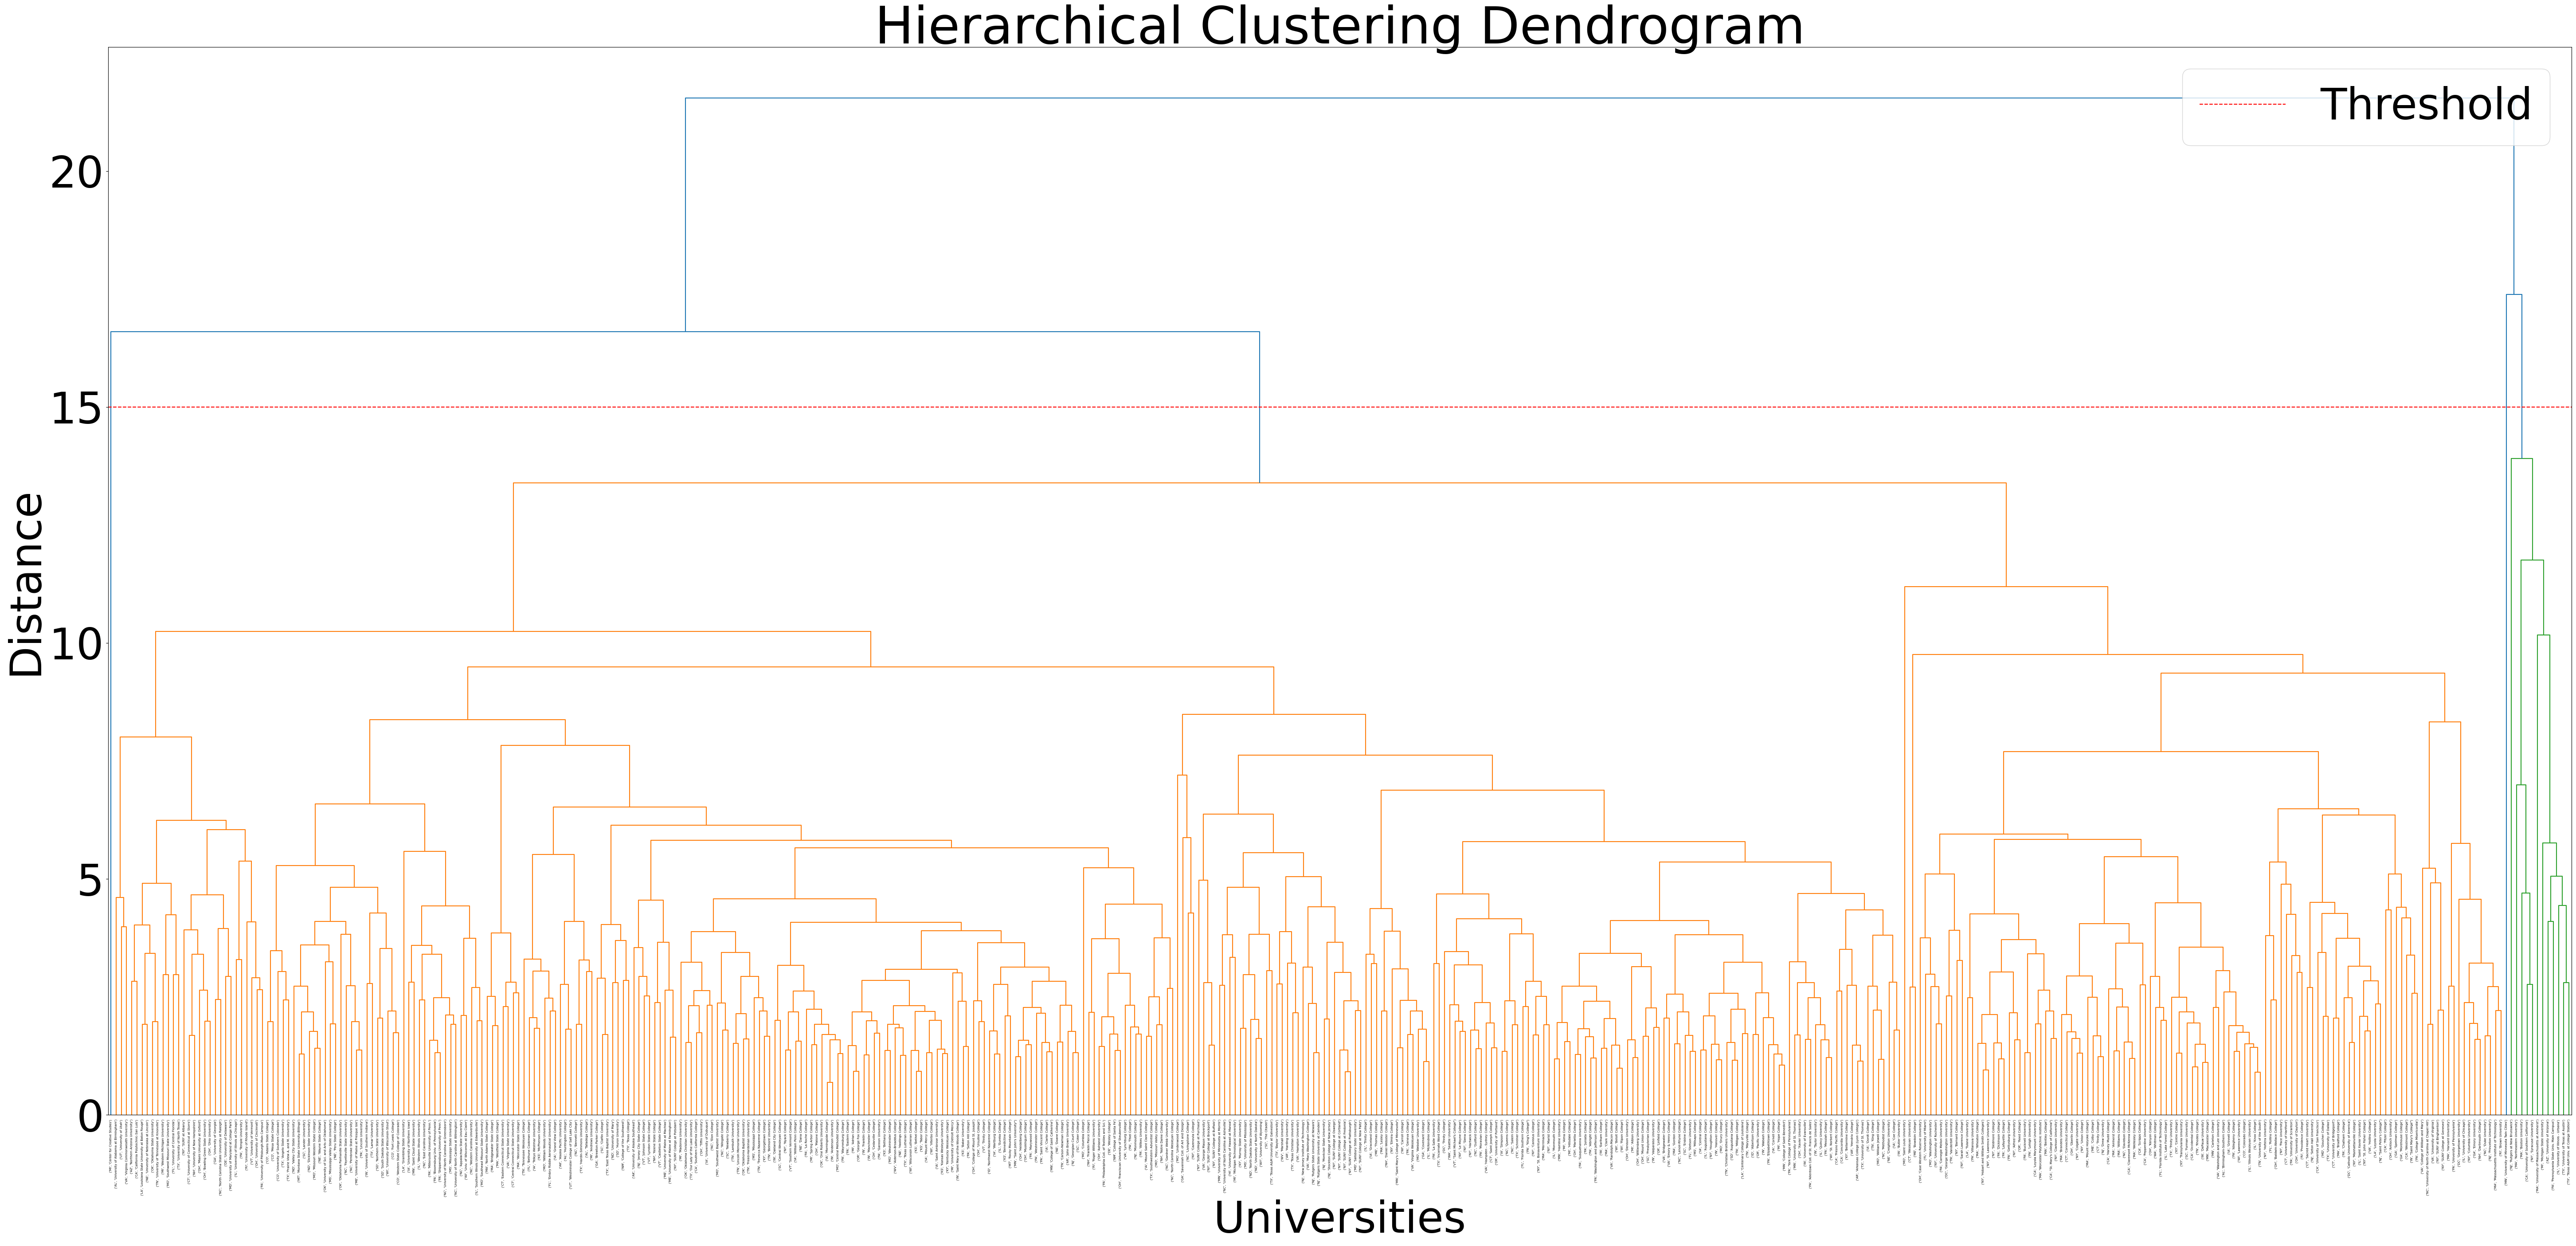

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering with complete linkage and Euclidean distance
clustering = linkage(universities_norm, method='complete', metric='euclidean')

# Set the threshold value
threshold = 15  # Adjust this value based on the dendrogram plot

# Set the figure size and font size
plt.figure(figsize=(60, 30))
plt.rcParams.update({'font.size': 70})

# Plot the dendrogram with university names as labels
dendrogram(clustering, labels=universities.index)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Universities')
plt.ylabel('Distance')

# Add the threshold line
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability

plt.tight_layout()  # Adjust the layout for better spacing

plt.show()


In [62]:
from scipy.cluster.hierarchy import fcluster

# Set the threshold value
threshold = 15  # Adjust this value based on the dendrogram plot

# Cut the dendrogram and assign data points to clusters
clusters = fcluster(clustering, threshold, criterion='distance')

# Count the unique cluster labels
num_clusters = len(set(clusters))

print("Number of clusters:", num_clusters)


Number of clusters: 4


In [63]:
from scipy.cluster.hierarchy import fcluster, linkage
import pandas as pd

# Perform hierarchical clustering with complete linkage
clustering = linkage(universities_norm, method='complete')

# Set the number of clusters
num_clusters = 4

# Assign cluster labels
memb = fcluster(clustering, num_clusters, criterion='maxclust')
memb = pd.Series(memb, index=universities_norm.index)

# Convert tuple indices to strings
memb.index = memb.index.map(str)

# Print the clusters
for cluster_num, universities in memb.groupby(memb):
    print(f'Cluster {cluster_num}: {", ".join(universities.index)}')


Cluster 1: ('AK', 'Alaska Pacific University'), ('AK', 'University of Alaska Southeast'), ('AL', 'Birmingham-Southern College'), ('AL', 'Huntingdon College'), ('AL', 'Talladega College'), ('AL', 'University of Alabama at Birmingham'), ('AR', 'Arkansas College (Lyon College)'), ('AR', 'Hendrix College'), ('AR', 'John Brown University'), ('AR', 'Harding University'), ('AZ', 'Northern Arizona University'), ('CA', 'California Polytechnic-San Luis'), ('CA', 'Claremont McKenna College'), ('CA', 'Harvey Mudd College'), ('CA', 'Pitzer College'), ('CA', 'Scripps College'), ('CA', 'Occidental College'), ('CA', 'Fresno Pacific College'), ('CA', 'Pepperdine University'), ('CA', 'Southern California College'), ('CA', "St. Mary's College of California"), ('CA', 'University of San Francisco'), ('CA', 'Westmont College'), ('CA', 'Loyola Marymount University'), ('CA', 'Concordia University'), ('CO', 'Adams State College'), ('CO', 'Colorado College'), ('CO', 'Fort Lewis College'), ('CO', 'Mesa State Col

In [64]:
kmeans= KMeans(n_clusters=4, random_state=0).fit(universities_norm)

**Question 2**

**Compare the summary statistics for each cluster and describe each cluster in this context (e.g., "Universities with high tuition, low acceptance rate...").** 

In [65]:
from sklearn.cluster import KMeans
centroids= pd.DataFrame(kmeans.cluster_centers_, columns= universities_norm.columns)

print(centroids)

   Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
0                 2.320319        0.821714          0.903657   
1                 4.469657        0.260254          0.325127   
2                 2.464541        2.933467          3.232319   
3                 4.456127        0.889926          0.818777   

   # new stud. enrolled  % new stud. from top 10%  % new stud. from top 25%  \
0              1.072360                  0.870047                  2.137012   
1              0.346861                  1.131540                  2.325324   
2              3.420530                  1.681522                  3.042130   
3              0.710475                  2.542562                  3.736309   

   # FT undergrad  # PT undergrad  in-state tuition  out-of-state tuition  \
0        1.052589        0.751615          0.407962              1.364864   
1        0.261520        0.257163          1.750724              2.247886   
2        3.372382        2.333393          0.693333 

- Public (1)/Private (2): The values represent the centroid labels for the "Public" and "Private" categories. For example, a value of 2.320319 in the first row suggests that the centroid belongs to the "Private" category.

- appli. rec'd: The values represent the average number of applications received by universities within each cluster.
- appl. accepted: The values represent the average number of applications accepted by universities within each cluster.
- new stud. enrolled: The values represent the average number of new students enrolled in universities within each cluster.

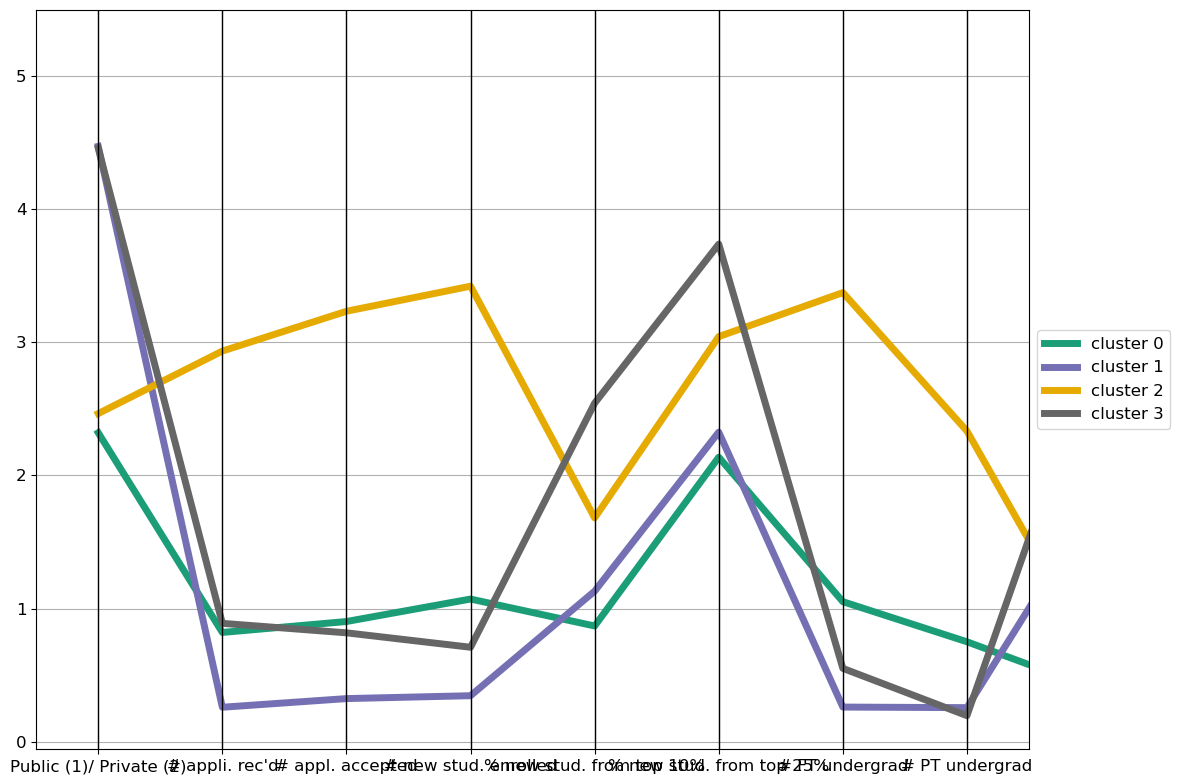

In [66]:
from pandas.plotting import parallel_coordinates

# Set the font size
plt.rcParams.update({'font.size': 12})

# Add the cluster labels
centroids['cluster'] = ['cluster {}'.format(i) for i in centroids.index]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the parallel coordinates graph
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)

# Set the legend position and size
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# Set the x-axis limits
plt.xlim(-0.5, 7.5)

# Adjust the layout
plt.tight_layout()

# Show the graph
plt.show()

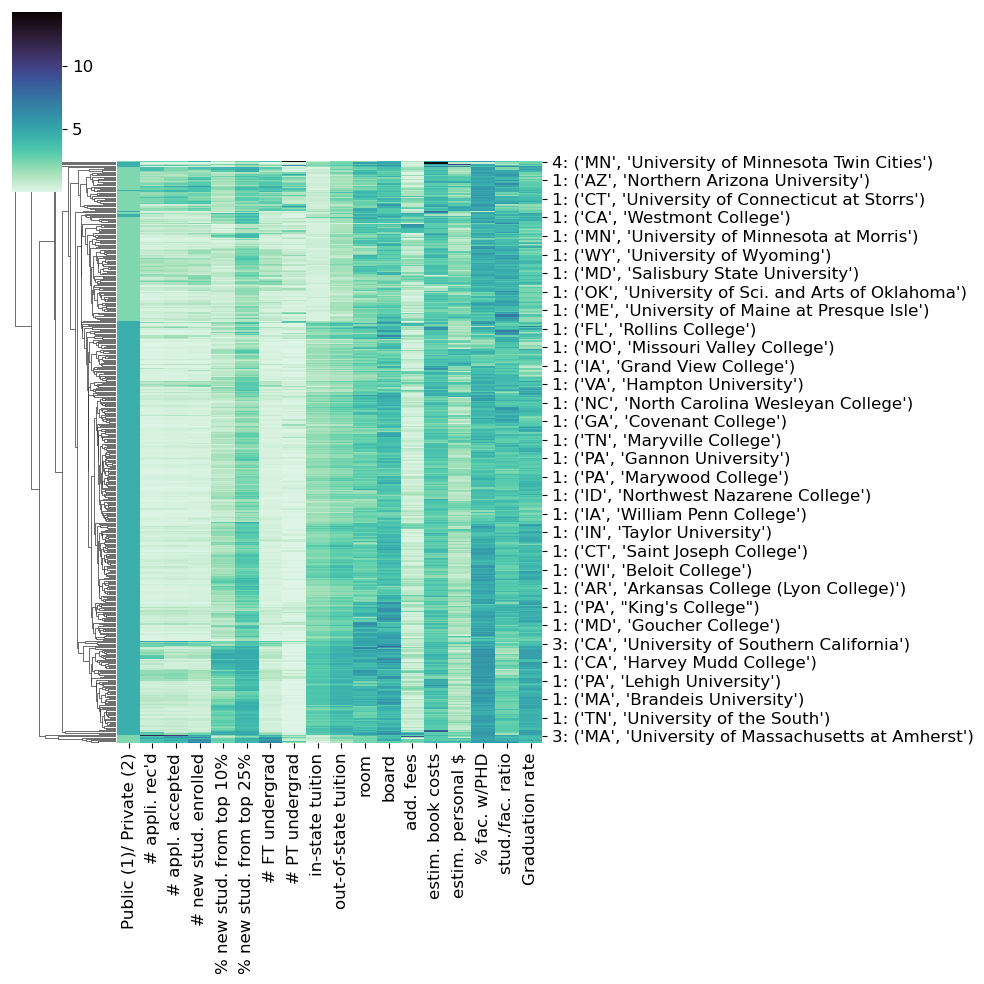

In [67]:
import seaborn as sns
universities_norm.index= ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, universities_norm.index)]
sns.clustermap(universities_norm, method = 'average', col_cluster=False, cmap="mako_r")
plt.show()

**Question 3**

**Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information?**

In [116]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [117]:
df = pd.read_csv(r"C:\\Users\\91958\\Documents\\SEM3\\Datamining_670CB\\dmba\\Universities.csv")

In [118]:
df.head(2)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN


In [119]:
# Select the columns for clustering
data_for_clustering = df[['Public (1)/ Private (2)', '# appli. rec\'d', '# appl. accepted',
                          '# new stud. enrolled', '% new stud. from top 10%',
                          '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
                          'in-state tuition', 'out-of-state tuition', 'room', 'board',
                          'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
                          'stud./fac. ratio', 'Graduation rate']]

# Handle missing values by imputing with column means
data_for_clustering = data_for_clustering.fillna(data_for_clustering.mean())

# Perform clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Count the universities in each cluster by categorical variables
cluster_counts = df.groupby(['Cluster', 'Public (1)/ Private (2)', 'State']).size().unstack()

# Print the cluster counts
print(cluster_counts)

State                             AK    AL   AR   AZ    CA   CO    CT   DC  \
Cluster Public (1)/ Private (2)                                              
0       1                        3.0  11.0  9.0  NaN   7.0  8.0   5.0  1.0   
        2                        1.0  10.0  8.0  1.0   2.0  1.0   NaN  1.0   
1       1                        NaN   2.0  NaN  3.0  20.0  4.0   1.0  NaN   
        2                        NaN   NaN  NaN  NaN   1.0  NaN   NaN  1.0   
2       1                        NaN   NaN  NaN  NaN   1.0  NaN   NaN  NaN   
        2                        NaN   2.0  NaN  1.0  39.0  3.0  13.0  6.0   

State                             DE    FL  ...   SD    TN    TX   UT    VA  \
Cluster Public (1)/ Private (2)             ...                               
0       1                        1.0   4.0  ...  6.0   6.0  16.0  2.0   9.0   
        2                        2.0  11.0  ...  4.0  20.0  25.0  1.0   8.0   
1       1                        NaN   5.0  ...  NaN   3.0 

- In Cluster 0, there are 3 universities that are public (1) and located in AK (Alaska), 11 universities that are public and located in AL (Alabama), 9 universities that are public and located in AR (Arkansas), and so on.
- In Cluster 0, there is 1 university that is private (2) and located in AK, 10 universities that are private and located in AL, 8 universities that are private and located in AR, and so on.

In [120]:
import pandas as pd
from scipy.stats import chi2_contingency

# Set 'Cluster' as an index
df.set_index('Cluster', inplace=True)

# Create a contingency table of clusters and public/private status
contingency_table = pd.crosstab(index=df.index,
                               columns=df['Public (1)/ Private (2)'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the chi-square test results
print("\nChi-Square Test:")
print("Chi-square value:", chi2)
print("p-value:", p_value)


Contingency Table:
Public (1)/ Private (2)    1    2
row_0                            
0                        326  291
1                        143    9
2                          1  532

Chi-Square Test:
Chi-square value: 594.42714024792
p-value: 8.351924282160937e-130


The contingency table shows the frequency distribution of the 'Public (1)/ Private (2)' variable across different clusters. The table displays the counts of universities in each cluster categorized as public (1) or private (2).

The chi-square test measures the independence between the clusters and the public/private status of universities. The calculated chi-square value of 594.43 indicates a significant association between the clusters and the public/private status. Additionally, the very low p-value (8.35e-130) suggests strong evidence against the null hypothesis of independence.

Therefore, based on the chi-square test results and the significant association observed, we can conclude that there is a relationship between the clusters and the public/private status of universities.

**Question 4**

**What other external information can explain the contents of some or all of these clusters?**

Some external factors that may provide insights into the cluster composition include:

- Geographic Location
- Funding Scores
- Prestige and Ranking
- Institutional Focus and Mission
- Enrollment Profile
- Affordability and Financial Aid

**Question 5**

**Consider Tufts University, which is missing some information. Compute the Euclidean distance of this record from each of the clusters that you found above (using only the measurements that you have). Which cluster is it closest to? Impute the missing values for Tufts by taking the average of the cluster on those measurements.**

In [127]:
tufts_university = df[df['College Name'] == 'Tufts University']
print(tufts_university)

             College Name State  Public (1)/ Private (2)  # appli. rec'd  \
Cluster                                                                    
2        Tufts University    MA                        2          7614.0   

         # appl. accepted  # new stud. enrolled  % new stud. from top 10%  \
Cluster                                                                     
2                  3605.0                1205.0                      60.0   

         % new stud. from top 25%  # FT undergrad  # PT undergrad  \
Cluster                                                             
2                            90.0          4598.0             NaN   

         in-state tuition  out-of-state tuition    room   board  add. fees  \
Cluster                                                                      
2                 19701.0               19701.0  3038.0  2930.0      503.0   

         estim. book costs  estim. personal $  % fac. w/PHD  stud./fac. ratio  \
Cluster        

In [128]:
print(df.index)


Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
            ...
            2, 2, 0, 0, 0, 0, 1, 2, 2, 0],
           dtype='int64', name='Cluster', length=1302)


In [133]:
import numpy as np

# Replace 'Tufts University' with the actual index label of the university
tufts_row = df.loc[df['College Name'] == 'Tufts University']

# Extract the relevant features for computing the Euclidean distance
features = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled',
            '% new stud. from top 10%', '% new stud. from top 25%',
            '# FT undergrad', '# PT undergrad', 'in-state tuition',
            'out-of-state tuition', 'room', 'board', 'add. fees',
            'estim. book costs', 'estim. personal $', '% fac. w/PHD',
            'stud./fac. ratio', 'Graduation rate']

tufts_features = tufts_row[features].values
cluster_centers = kmeans.cluster_centers_[:, 1:]  # Exclude the first column (categorical feature)

# Compute the Euclidean distance to each cluster center
distances = np.linalg.norm(cluster_centers - tufts_features, axis=1)

# Find the closest cluster
closest_cluster = np.argmin(distances)

# Impute missing values with the mean values of the closest cluster
tufts_row[features] = np.where(np.isnan(tufts_row[features]), 
                               np.mean(cluster_centers[closest_cluster], axis=0),
                               tufts_row[features])

# Print the closest cluster and the imputed values for Tufts University
print("Closest Cluster:", closest_cluster)
print("Imputed Values for Tufts University:")
print(tufts_row[features])


Closest Cluster: 0
Imputed Values for Tufts University:
         # appli. rec'd  # appl. accepted  # new stud. enrolled  \
Cluster                                                           
2                7614.0            3605.0                1205.0   

         % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
Cluster                                                                       
2                            60.0                      90.0          4598.0   

         # PT undergrad  in-state tuition  out-of-state tuition    room  \
Cluster                                                                   
2            1478.86108           19701.0               19701.0  3038.0   

          board  add. fees  estim. book costs  estim. personal $  \
Cluster                                                            
2        2930.0      503.0              600.0              928.0   

         % fac. w/PHD  stud./fac. ratio  Graduation rate  
Cluster       

C:\Users\91958\AppData\Local\Temp\ipykernel_13508\3551144190.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tufts_row[features] = np.where(np.isnan(tufts_row[features]),


- The closest cluster for Tufts University is Cluster 0, and the missing values have been imputed by taking the mean values of the corresponding features in Cluster 0.

- The imputed values for Tufts University are provided in the "Imputed Values for Tufts University" section. These values are based on the average values of the features in Cluster 0, and they replace the missing values in Tufts University's row.